### Project Background

In New York City, Manhattan is home to world-class cuisine and is certainly a foodie’s paradise - options abound from street food to heritage dining spots and fine dining restaurants, and across all sorts of cuisines no less. With a multitude of options at your fingertips, it can sometimes be difficult to decide where to go for dinner, and have the added confidence that your restaurant of choice serves quality food.

Furthermore, foodies often look for restaurants with specific cravings in mind - you may crave Chinese food on a given night and Korean food the next. For the adventurous among us, it would be helpful to know the areas in Manhattan that tend to house quality Chinese and/or Korean restaurants for our exploration. 


### Data description

Foursquare contains location data on:
- All of Manhattan's neighborhoods; and
- A large sample of restaurants across various cuisines.

This project seeks to create a map with circular markers representing each of the neighborhoods, each color-coded by the cuisine that most frequently features within that neighborhood. 

The result will be a map of neighborhoods illustrating the relative distribution of cuisines in Manhattan (based on the most popular cuisine in each neighborhood). This will allow adventurous foodies to decide where to go on their next restaurant crawl, if they are particularly craving e.g. Chinese food on that particular day.


### Step 1: Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


import requests
print('Libraries imported.')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
done

# All requested packages already installed.

Libraries imported.


### Step 2: Establish FourSquare credentials

In [63]:
CLIENT_ID = '' # my Foursquare ID, censored here for sharing purposes
CLIENT_SECRET = '' # my Foursquare Secret, censored here for sharing purposes
VERSION = '20180604'
ACCESS_TOKEN = '' # my access token, censored here for sharing purposes
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 05LGZYWUSBRB5WTYY3NW3J1O2QRDYKMFJSOODCAO2BT2Q2LP
CLIENT_SECRET:B1QOXL0ROYPQXZUWD025SC1SIL5CGHIE54FKVWAB0F4EPL0S


In [3]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7896239 -73.9598939


In [4]:
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=12)
   
map_manhattan

### Step 3: Creating the list of queries for the Foursquare API

For this step, I manually created a list of all the neighborhoods in Manhattan.

In [5]:
dict={'Neighborhood':['Upper Manhattan, NY',
'Marble Hill, NY',
'Inwood, NY',
'Fort George, NY',
'Washington Heights, NY',
'Hudson Heights, NY',
'West Harlem, NY',
'Hamilton Heights, NY',
'Manhattanville, NY',
'Morningside Heights, NY',
'Central Harlem, NY',
'Harlem, NY',
'St. Nicholas Historic District, NY',
'Astor Row, NY',
'Sugar Hill, NY',
'Marcus Garvey Park, NY',
'Little Senegal, NY',
'East Harlem, NY',
'Upper East Side, NY',
'Lenox Hill, NY',
'Carnegie Hill, NY',
'Yorkville, NY',
'Upper West Side, NY',
'Manhattan Valley, NY',
'Lincoln Square, NY',
'Columbus Circle, NY',
'Sutton Place, NY',
'Rockefeller Center, NY',
'Diamond District, NY',
'Theater District, NY',
'Turtle Bay, NY',
'Midtown East, NY',
'Midtown, NY',
'Tudor City, NY',
'Little Brazil, NY',
'Times Square, NY',
'Hudson Yards, NY',
'Midtown West, NY',
'Garment District, NY',
'Herald Square, NY',
'Koreatown, NY',
'Murray Hill, NY',
'Tenderloin, NY',
'Madison Square, NY',
'Flower District, NY',
'Brookdale, NY',
'Hudson Yards, NY',
'Kips Bay, NY',
'Rose Hill, NY',
'NoMad, NY',
'Peter Cooper Village, NY',
'Chelsea, NY',
'Flatiron District, NY',
'Gramercy Park, NY',
'Stuyvesant Square, NY',
'Union Square, NY',
'Stuyvesant Town, NY',
'Meatpacking District, NY',
'Waterside Plaza, NY',
'Downtown Manhattan, NY',
'Little Germany, NY',
'Alphabet City and Loisaida, NY',
'East Village, NY',
'Greenwich Village, NY',
'NoHo, NY',
'Bowery, NY',
'West Village, NY',
'Lower East Side, NY',
'SoHo, NY',
'Nolita, NY',
'Little Australia, NY',
'Little Italy, NY',
'Chinatown, NY',
'Financial District, NY',
'Five Points, NY',
'Cooperative Village, NY',
'Two Bridges, NY',
'Tribeca, NY',
'Civic Center, NY',
'Radio Row, NY',
'South Street Seaport Historical District, NY',
'Battery Park City, NY',
'Little Syria, NY']}

In [6]:
df=pd.DataFrame(dict)
df["Lat"]=""
df["Lng"]=""
df

,Neighborhood,Lat,Lng
0,"Upper Manhattan, NY",,
1,"Marble Hill, NY",,
2,"Inwood, NY",,
3,"Fort George, NY",,
4,"Washington Heights, NY",,
5,"Hudson Heights, NY",,
6,"West Harlem, NY",,
7,"Hamilton Heights, NY",,
8,"Manhattanville, NY",,
9,"Morningside Heights, NY",,


### Step 4: Retrieving geographical coordinates for mapping

In [7]:
x=0
while x!=83:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(df['Neighborhood'][x])
    try:
        latitude = location.latitude
    except AttributeError:
        latitude=np.nan
    try:
        longitude = location.longitude
    except AttributeError:
        longitude=np.nan
    df['Lat'][x]=latitude
    df['Lng'][x]=longitude
    x=x+1
df

,Neighborhood,Lat,Lng
0,"Upper Manhattan, NY",40.787045,-73.975416
1,"Marble Hill, NY",40.876298,-73.910429
2,"Inwood, NY",40.869258,-73.920495
3,"Fort George, NY",40.859947,-73.928225
4,"Washington Heights, NY",40.840198,-73.940221
5,"Hudson Heights, NY",40.853131,-73.939319
6,"West Harlem, NY",40.807879,-73.945415
7,"Hamilton Heights, NY",40.824145,-73.950062
8,"Manhattanville, NY",40.815778,-73.951554
9,"Morningside Heights, NY",40.81,-73.9625


I then remove the neighborhoods for which Foursquare did not return any coordinates:

In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df

,Neighborhood,Lat,Lng
0,"Upper Manhattan, NY",40.787045,-73.975416
1,"Marble Hill, NY",40.876298,-73.910429
2,"Inwood, NY",40.869258,-73.920495
3,"Fort George, NY",40.859947,-73.928225
4,"Washington Heights, NY",40.840198,-73.940221
5,"Hudson Heights, NY",40.853131,-73.939319
6,"West Harlem, NY",40.807879,-73.945415
7,"Hamilton Heights, NY",40.824145,-73.950062
8,"Manhattanville, NY",40.815778,-73.951554
9,"Morningside Heights, NY",40.81,-73.9625


### Step 5: Plotting neighborhoods on the Manhattan map

To aid visualization and to ensure we are on the right track:

In [10]:
# add markers to map
for lat, lng, neighborhood in zip(df['Lat'], df['Lng'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  

map_manhattan

### Step 6: Exploring all these neighborhoods through Foursquare

I start by defining methods to obtain the list of categories for nearby venues in every neighborhood through Foursquare:

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
mh_venues=getNearbyVenues(names=df['Neighborhood'], latitudes=df['Lat'], longitudes=df['Lng'])

Upper Manhattan, NY
Marble Hill, NY
Inwood, NY
Fort George, NY
Washington Heights, NY
Hudson Heights, NY
West Harlem, NY
Hamilton Heights, NY
Manhattanville, NY
Morningside Heights, NY
Central Harlem, NY
Harlem, NY
Astor Row, NY
Sugar Hill, NY
Marcus Garvey Park, NY
Little Senegal, NY
East Harlem, NY
Upper East Side, NY
Lenox Hill, NY
Carnegie Hill, NY
Yorkville, NY
Upper West Side, NY
Manhattan Valley, NY
Lincoln Square, NY
Columbus Circle, NY
Sutton Place, NY
Rockefeller Center, NY
Diamond District, NY
Theater District, NY
Turtle Bay, NY
Midtown East, NY
Midtown, NY
Tudor City, NY
Little Brazil, NY
Times Square, NY
Hudson Yards, NY
Midtown West, NY
Garment District, NY
Herald Square, NY
Koreatown, NY
Murray Hill, NY
Madison Square, NY
Flower District, NY
Brookdale, NY
Hudson Yards, NY
Kips Bay, NY
Rose Hill, NY
NoMad, NY
Peter Cooper Village, NY
Chelsea, NY
Flatiron District, NY
Gramercy Park, NY
Stuyvesant Square, NY
Union Square, NY
Stuyvesant Town, NY
Meatpacking District, NY
Wate

In [14]:
print('There are {} unique categories.'.format(len(mh_venues['Venue Category'].unique())))

There are 278 unique categories.


### Step 7: Listing the Foursquare results in a table

Here, the results will show us every single point of interest line by line, under the 278 unique categories.

For example, in index[2], we see an American restaurant in Upper Manhattan.

In [15]:
# one hot encoding
mh_onehot = pd.get_dummies(mh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mh_onehot['Neighborhood'] = mh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mh_onehot.columns[-1]] + list(mh_onehot.columns[:-1])
mh_onehot = mh_onehot[fixed_columns]

mh_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Theater,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Puerto Rican Restaurant,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Synagogue,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tiki Bar,Toy / Game Store,Track,Trail,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game 

We see that the results include categories that are not restaurants, e.g. 'Accessories Store'. These are not of interest for this particular exercise. Hence, we will remove all non-Restaurant categories.

### Step 8: Removing all results that do not refer to restaurants

In [16]:
mh_onehot.drop([col for col in mh_onehot.columns if 'Restaurant' not in col and 'Neighborhood' not in col],axis=1, inplace=True)
mh_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Paella Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Upper Manhattan, NY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Upper Manhattan, NY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Upper Manhattan, NY",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Upper Manhattan, NY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Upper Manhattan, NY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 9: Identifying the most prominent cuisine in each neighborhood

Now, we group the points of interest by their respective neighborhoods and arrange them in descending order of frequency.

In [17]:
mh_grouped = mh_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 5

for hood in mh_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mh_grouped[mh_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alphabet City and Loisaida, NY----
                         venue  freq
0      Puerto Rican Restaurant  0.03
1             Asian Restaurant  0.03
2    Latin American Restaurant  0.03
3         Brazilian Restaurant  0.03
4  Eastern European Restaurant  0.03


----Astor Row, NY----
                             venue  freq
0  Southern / Soul Food Restaurant  0.10
1                French Restaurant  0.07
2                 Sushi Restaurant  0.07
3               African Restaurant  0.03
4               Spanish Restaurant  0.03


----Battery Park City, NY----
                     venue  freq
0      American Restaurant  0.03
1        Afghan Restaurant  0.00
2       Persian Restaurant  0.00
3  Scandinavian Restaurant  0.00
4       Russian Restaurant  0.00


----Bowery, NY----
                   venue  freq
0      Hotpot Restaurant  0.10
1     Chinese Restaurant  0.10
2  Vietnamese Restaurant  0.07
3       Asian Restaurant  0.03
4        Thai Restaurant  0.03


----Carnegie Hill, NY----
    

Defining a method to obtain the most common venue categories per neighborhood:

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mh_grouped['Neighborhood']

for ind in np.arange(mh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Alphabet City and Loisaida, NY",Puerto Rican Restaurant,Asian Restaurant,Latin American Restaurant,Brazilian Restaurant,Eastern European Restaurant,Italian Restaurant,Afghan Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant
1,"Astor Row, NY",Southern / Soul Food Restaurant,French Restaurant,Sushi Restaurant,African Restaurant,Spanish Restaurant,Chinese Restaurant,Comfort Food Restaurant,Seafood Restaurant,Afghan Restaurant,Ramen Restaurant
2,"Battery Park City, NY",American Restaurant,Afghan Restaurant,Persian Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Peking Duck Restaurant
3,"Bowery, NY",Hotpot Restaurant,Chinese Restaurant,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Peruvian Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant
4,"Carnegie Hill, NY",French Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Kosher Restaurant,Restaurant,Scandinavian Restaurant,Russian Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant


Using the above information, a foodie would know that e.g. Bowery contains predominantly Hotpot restaurants. Should s/he crave hotpot on a particular day, s/he could simply look up the table of results above for neighborhoods similar to Bowery.

#### In other words, at this point we have obtained enough information for most foodies to identify suitable neighborhoods for the cuisines they desire.

However, for the sake of practice, let us now conduct k-means clustering to see if we may glean any further findings. K-means clustering in this case would compare neighborhoods across their top 10 most common venues, and cluster them.

### Step 10: K-Means Clustering

#### Finding the optimal K

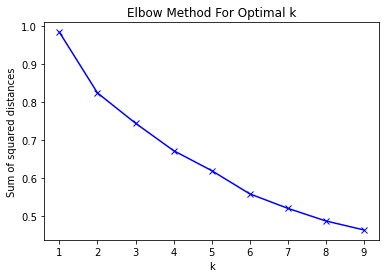

In [19]:
# Elbow method to find optimal K
import matplotlib.pyplot as plt

x = mh_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=5)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Through experimentation, the value for k that produced the most meaningful results was k=6.

In [20]:
# set number of clusters
kclusters = 6

mh_grouped_clustering = mh_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 3, 4, 5, 1, 5, 4, 4, 5], dtype=int32)

Labelling each neighborhood based on their cluster:

In [21]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mh_merged = df

# merge sydney_grouped with df_sydney3 to add latitude/longitude for each neighborhood
mh_merged = mh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mh_merged.head() # check the cluster labels column!

,Neighborhood,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Upper Manhattan, NY",40.787045,-73.975416,0.0,Italian Restaurant,American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Greek Restaurant,Peruvian Restaurant,Ramen Restaurant
1,"Marble Hill, NY",40.876298,-73.910429,3.0,Seafood Restaurant,Persian Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Afghan Restaurant,African Restaurant
2,"Inwood, NY",40.869258,-73.920495,3.0,Mexican Restaurant,Italian Restaurant,American Restaurant,Latin American Restaurant,Restaurant,Scandinavian Restaurant,Russian Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant
3,"Fort George, NY",40.859947,-73.928225,3.0,Mexican Restaurant,American Restaurant,Latin American Restaurant,Spanish Restaurant,Chinese Restaurant,Tapas Restaurant,Peruvian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant
4,"Washington Heights, NY",40.840198,-73.940221,3.0,Latin American Restaurant,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Korean Restaurant,Empanada Restaurant,Spanish Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant


In [22]:
mh_merged = mh_merged.dropna()
mh_merged['Cluster Labels'] = mh_merged['Cluster Labels'].astype(int)

We may now examine the clusters and see how the cuisines were grouped, making reference to their 1st most common cuisine:

In [23]:
top_venue_count = mh_merged
top_venue_count = top_venue_count.drop(['Neighborhood','Lat','Lng'], axis=1)
top_venue_count = top_venue_count.groupby(['Cluster Labels', '1st Most Common Venue']).size().reset_index(name='Count')
top_venue_count

,Cluster Labels,1st Most Common Venue,Count
0,0,Italian Restaurant,6
1,1,Indian Restaurant,1
2,1,Korean Restaurant,1
3,1,Southern / Soul Food Restaurant,4
4,2,Korean Restaurant,1
5,3,Afghan Restaurant,4
6,3,American Restaurant,4
7,3,Chinese Restaurant,1
8,3,French Restaurant,2
9,3,Italian Restaurant,5


In [59]:
cluster_venue = top_venue_count.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Count')
# change NaN values to 0
cluster_venue = cluster_venue.fillna(0).astype(int).reset_index(drop=True)
cluster_venue

1st Most Common Venue,Afghan Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Puerto Rican Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,4,1,2,0,0,5,1,0,1,3,7,1,5,0,1,1,2,1,3
4,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,8,0,5,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0


#### From the table above, however, we notice that there is no significant difference between Clusters 3 and 5. These 2 clusters do not selectively contain cuisines that are unique from the other categories. Thus, let us merge these two clusters:

In [60]:
cluster_venue.loc[3]+=cluster_venue.loc[5]
cluster_venue

1st Most Common Venue,Afghan Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Puerto Rican Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,12,1,7,0,0,9,1,0,1,3,7,1,5,0,2,1,2,1,3
4,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,8,0,5,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [61]:
cluster_venue.drop([5],inplace=True)
cluster_venue

1st Most Common Venue,Afghan Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Puerto Rican Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,12,1,7,0,0,9,1,0,1,3,7,1,5,0,2,1,2,1,3
4,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 11: Visualizing the Clustering.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

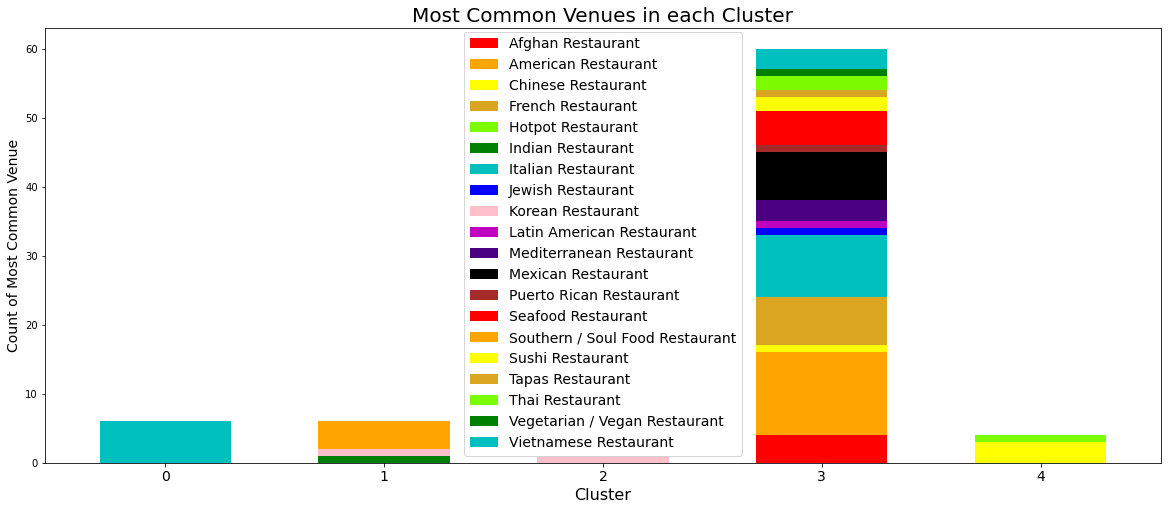

In [39]:
# Create a bar chart of most common venues of each cluster
my_colors = ['r','orange','yellow','goldenrod','lawngreen','g','c','b','pink','m','indigo','k','brown']
cv_plot = cluster_venue.plot(kind='bar', stacked=True,
                            figsize=(20,8), color=my_colors,
                            width=0.6)
plt.title("Most Common Venues in each Cluster", fontsize=20)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Count of Most Common Venue", fontsize=14)
plt.legend(labels=cluster_venue.columns, fontsize=14)
plt.xticks(rotation=0, fontsize=14)

As expected, we see some unique groupings in Clusters 0, 1, 2, and 4.

In [41]:
cluster_label = {'Cluster':[0,1,2,3,4], 'Label':['Italian', 'Indian & Southern', 'Korean', 'Others', 'Chinese']}
cluster_label = pd.DataFrame(data=cluster_label)
cluster_label

,Cluster,Label
0,0,Italian
1,1,Indian & Southern
2,2,Korean
3,3,Others
4,4,Chinese


### Step 12: Preparing the reference dataframe for the final Map

In [48]:
mh_merged=mh_merged.merge(cluster_label[['Cluster','Label']],left_on='Cluster Labels', right_on='Cluster')
mh_merged=mh_merged.drop(['Cluster'],axis=1)
mh_merged

,Neighborhood,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Label
0,"Upper Manhattan, NY",40.787045,-73.975416,0,Italian Restaurant,American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Greek Restaurant,Peruvian Restaurant,Ramen Restaurant,Italian
1,"Morningside Heights, NY",40.81,-73.9625,0,Italian Restaurant,Mexican Restaurant,American Restaurant,New American Restaurant,Chinese Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Italian
2,"Upper West Side, NY",40.787045,-73.975416,0,Italian Restaurant,American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Greek Restaurant,Peruvian Restaurant,Ramen Restaurant,Italian
3,"Madison Square, NY",40.742108,-73.988072,0,Italian Restaurant,Chinese Restaurant,Lebanese Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,New American Restaurant,Kebab Restaurant,Russian Restaurant,Restaurant,Italian
4,"West Village, NY",40.734186,-74.00558,0,Italian Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Mediterranean Restaurant,Puerto Rican Restaurant,Seafood Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Italian
5,"Nolita, NY",40.721006,-73.994702,0,Italian Restaurant,Mediterranean Restaurant,Thai Restaurant,Falafel Restaurant,Japanese Restaurant,Cuban Restaurant,Australian Restaurant,American Restaurant,Seafood Restaurant,Paella Restaurant,Italian
6,"Marble Hill, NY",40.876298,-73.910429,3,Seafood Restaurant,Persian Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Afghan Restaurant,African Restaurant,Others
7,"Inwood, NY",40.869258,-73.920495,3,Mexican Restaurant,Italian Restaurant,American Restaurant,Latin American Restaurant,Restaurant,Scandinavian Restaurant,Russian Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Others
8,"Fort George, NY",40.859947,-73.928225,3,Mexican Restaurant,American Restaurant,Latin American Restaurant,Spanish Restaurant,Chinese Restaurant,Tapas Restaurant,Peruvian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Others
9,"Washington Heights, NY",40.840198,-73.940221,3,Latin American Restaurant,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Korean Restaurant,Empanada Restaurant,Spanish Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Others


As we did above, in this next step we merge clusters 3 and 5 in the table.

In [49]:
mh_merged['Cluster Labels']=mh_merged['Cluster Labels'].replace([5],3)
mh_merged

,Neighborhood,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Label
0,"Upper Manhattan, NY",40.787045,-73.975416,0,Italian Restaurant,American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Greek Restaurant,Peruvian Restaurant,Ramen Restaurant,Italian
1,"Morningside Heights, NY",40.81,-73.9625,0,Italian Restaurant,Mexican Restaurant,American Restaurant,New American Restaurant,Chinese Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Italian
2,"Upper West Side, NY",40.787045,-73.975416,0,Italian Restaurant,American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Greek Restaurant,Peruvian Restaurant,Ramen Restaurant,Italian
3,"Madison Square, NY",40.742108,-73.988072,0,Italian Restaurant,Chinese Restaurant,Lebanese Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,New American Restaurant,Kebab Restaurant,Russian Restaurant,Restaurant,Italian
4,"West Village, NY",40.734186,-74.00558,0,Italian Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Mediterranean Restaurant,Puerto Rican Restaurant,Seafood Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Italian
5,"Nolita, NY",40.721006,-73.994702,0,Italian Restaurant,Mediterranean Restaurant,Thai Restaurant,Falafel Restaurant,Japanese Restaurant,Cuban Restaurant,Australian Restaurant,American Restaurant,Seafood Restaurant,Paella Restaurant,Italian
6,"Marble Hill, NY",40.876298,-73.910429,3,Seafood Restaurant,Persian Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Afghan Restaurant,African Restaurant,Others
7,"Inwood, NY",40.869258,-73.920495,3,Mexican Restaurant,Italian Restaurant,American Restaurant,Latin American Restaurant,Restaurant,Scandinavian Restaurant,Russian Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Others
8,"Fort George, NY",40.859947,-73.928225,3,Mexican Restaurant,American Restaurant,Latin American Restaurant,Spanish Restaurant,Chinese Restaurant,Tapas Restaurant,Peruvian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Others
9,"Washington Heights, NY",40.840198,-73.940221,3,Latin American Restaurant,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Korean Restaurant,Empanada Restaurant,Spanish Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Others


As a final additional step, we see an exception in the clustering results that should be manually corrected. Index[70] shows Herald Square, a neighborhood that features 1 of the only 2 neighborhoods in Manhattan whose most prominent cuisine is Korean cuisine. 

To draw more meaningful results, let us shift Herald Square to Cluster 2, which features only Korean cuisine:

In [57]:
mh_merged.at[70,'Cluster Labels']=2
mh_merged.at[70,'Label']='Korean'
mh_merged

,Neighborhood,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Label
0,"Upper Manhattan, NY",40.787045,-73.975416,0,Italian Restaurant,American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Greek Restaurant,Peruvian Restaurant,Ramen Restaurant,Italian
1,"Morningside Heights, NY",40.81,-73.9625,0,Italian Restaurant,Mexican Restaurant,American Restaurant,New American Restaurant,Chinese Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Italian
2,"Upper West Side, NY",40.787045,-73.975416,0,Italian Restaurant,American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Greek Restaurant,Peruvian Restaurant,Ramen Restaurant,Italian
3,"Madison Square, NY",40.742108,-73.988072,0,Italian Restaurant,Chinese Restaurant,Lebanese Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,New American Restaurant,Kebab Restaurant,Russian Restaurant,Restaurant,Italian
4,"West Village, NY",40.734186,-74.00558,0,Italian Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Mediterranean Restaurant,Puerto Rican Restaurant,Seafood Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Italian
5,"Nolita, NY",40.721006,-73.994702,0,Italian Restaurant,Mediterranean Restaurant,Thai Restaurant,Falafel Restaurant,Japanese Restaurant,Cuban Restaurant,Australian Restaurant,American Restaurant,Seafood Restaurant,Paella Restaurant,Italian
6,"Marble Hill, NY",40.876298,-73.910429,3,Seafood Restaurant,Persian Restaurant,Scandinavian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Afghan Restaurant,African Restaurant,Others
7,"Inwood, NY",40.869258,-73.920495,3,Mexican Restaurant,Italian Restaurant,American Restaurant,Latin American Restaurant,Restaurant,Scandinavian Restaurant,Russian Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Peruvian Restaurant,Others
8,"Fort George, NY",40.859947,-73.928225,3,Mexican Restaurant,American Restaurant,Latin American Restaurant,Spanish Restaurant,Chinese Restaurant,Tapas Restaurant,Peruvian Restaurant,Russian Restaurant,Restaurant,Ramen Restaurant,Others
9,"Washington Heights, NY",40.840198,-73.940221,3,Latin American Restaurant,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Korean Restaurant,Empanada Restaurant,Spanish Restaurant,Restaurant,Ramen Restaurant,Puerto Rican Restaurant,Others


# Results and Discussion

### Creating the Map

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, lbl in zip(
        mh_merged['Lat'], 
        mh_merged['Lng'], 
        mh_merged['Neighborhood'], 
        mh_merged['Cluster Labels'],
        mh_merged['Label']):
    label = folium.Popup(str(poi) + ', ' + ' Cluster ' + str(cluster) + ' - ' + str(lbl), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

### Findings and Concluding Remarks

Through K-means clustering, we found the following clusters of similar neighborhoods, as well as their predominant cuisines:
- Cluster 0 (Red): features predominantly Italian food;
- Cluster 1 (Purple): features predominantly Indian & Southern food;
- Cluster 2 (Blue): features predominantly Korean food;
- Cluster 4 (Light Green): features predominantly Chinese food;
- Cluster 3 (Teal): features all other cuisines.

The main takeaway from this study has been identifying hotspots of cuisines. In particular:
- Chinese food is particularly prominent in lower Manhattan and only there;
- Korean food is prominent only in Koreatown and Herald Square.
- Beyond this, Indian & Southern as well as Italian food are scattered in Manhattan: less prominent, but still noticeable through the clustering exercise.

For foodies looking for Korean and Chinese food, their cravings may best be satisfied in the localities identified above.

Potentially, Cluster 3 could have been further broken down, perhaps by specifying a higher value for k during the clustering exercise. This provider viewers with more information on where to visit e.g. for French cuisine. 

However, as mentioned above, this has already been accomplished by the end of Step 9. The key purpose for steps 10 to 12 was to draw further insights through k-means clustering. At the very least, this has revealed two separate findings:
- While Cluster 0 and Cluster 1 neighoborhoods are similar within their respective clusters, they are scattered throughout Manhattan;
- Cluster 4 features a unique band of close neighborhoods that all serve predominantly Chinese food.

Perhaps the next time foodies go about searching for Chinese food, they will appreciate this additional tidbit of trivia!